In [2]:
import torch
import torch.nn as nn
from torch import optim

import numpy as np
import pandas as pd

from utils import FaceKeypointDataset, transform, train_test_split, train
from model.network import Net

In [2]:
annotations_df = pd.read_csv('data/Annotations/annotations.csv')
images_dir = 'data/Images/'

In [3]:
dataset = FaceKeypointDataset(annotations=annotations_df, 
                              root_dir=images_dir, 
                              transform=transform)

In [4]:
train_loader, val_loader, test_loader = train_test_split(dataset, 
                                                         train_size=0.8, 
                                                         val_size=0.1, 
                                                         batch_size=64)

In [5]:
model = Net()

In [6]:
criterion_keypoints = nn.MSELoss()
criterion_bbox = nn.SmoothL1Loss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [7]:
train(model, 
      criterion_keypoints, 
      criterion_bbox, 
      optimizer, 
      train_loader, 
      val_loader, 
      epochs=50, 
      device='cuda', 
      bbox_weight=1.0)

Epoch 1/50 | Train Loss: 157736.8850 | Val Loss: 156571.0324


Epoch 2/50 | Train Loss: 146356.9423 | Val Loss: 155394.8648


Epoch 3/50 | Train Loss: 146036.3615 | Val Loss: 161470.5294


Epoch 4/50 | Train Loss: 144814.4055 | Val Loss: 157914.8778


Epoch 5/50 | Train Loss: 146374.0063 | Val Loss: 154740.2686


Epoch 6/50 | Train Loss: 144505.9425 | Val Loss: 155637.1828


Epoch 7/50 | Train Loss: 143289.6003 | Val Loss: 155895.1840


Epoch 8/50 | Train Loss: 142338.8987 | Val Loss: 154208.1923


Epoch 9/50 | Train Loss: 141953.8922 | Val Loss: 155547.6949


Epoch 10/50 | Train Loss: 141975.4155 | Val Loss: 154656.4604


Epoch 11/50 | Train Loss: 141276.0239 | Val Loss: 150518.0586


Epoch 12/50 | Train Loss: 140831.9405 | Val Loss: 159646.6008


Epoch 13/50 | Train Loss: 141405.8623 | Val Loss: 153165.1097


Epoch 14/50 | Train Loss: 140504.8742 | Val Loss: 155883.9355


Epoch 15/50 | Train Loss: 139091.5527 | Val Loss: 157412.5327


Epoch 16/50 | Train Loss: 139549.5942 | Val Loss: 150412.3549


Epoch 17/50 | Train Loss: 137852.1606 | Val Loss: 149483.1624


Epoch 18/50 | Train Loss: 136079.7780 | Val Loss: 187645.4356


Epoch 19/50 | Train Loss: 135994.3501 | Val Loss: 155227.6481


Epoch 20/50 | Train Loss: 137051.0910 | Val Loss: 155794.4511


Epoch 21/50 | Train Loss: 134754.4090 | Val Loss: 147587.1631


Epoch 22/50 | Train Loss: 133807.5515 | Val Loss: 160750.5657


Epoch 23/50 | Train Loss: 133935.8376 | Val Loss: 153645.6406


KeyboardInterrupt: 

In [8]:
torch.save(model.state_dict(), 'model_test_23_epochs_01122025.pth')

C:\Users\first\AppData\Local\Temp\ipykernel_14668\3755235618.py:18: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


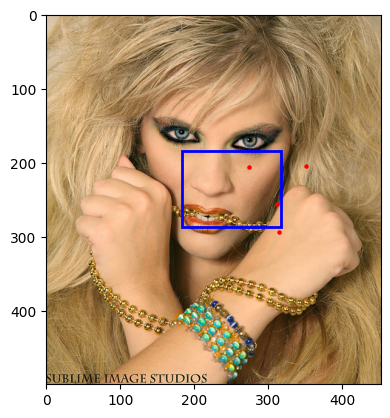

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

test_image = r"data\Images\image00002.jpg"

# Load the image
image = Image.open(test_image)

# Transform the image
transformed_image = transform(image)

# Add batch dimension
transformed_image = transformed_image.unsqueeze(0)

# Load the model
model_path = 'model_test_23_epochs_01122025.pth'
model = Net()
model.load_state_dict(torch.load(model_path))
model.to('cuda')
model.eval()

# Perform inference
with torch.no_grad():
    output = model(transformed_image.to('cuda'))

# Process the output (assuming the model outputs keypoints and bbox)
keypoints, bbox = output

# Convert keypoints and bbox to numpy arrays
keypoints = keypoints.cpu().numpy().reshape(-1, 2)
bbox = bbox.cpu().numpy().flatten()

# Plot the image and keypoints
plt.imshow(image)
plt.scatter(keypoints[:, 0], keypoints[:, 1], s=20, marker='.', c='r')
# Plot the bounding box
rect = plt.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], fill=False, color='blue', linewidth=2)
plt.gca().add_patch(rect)
plt.show()